# Introduction to Data Science and Machine Learning


## DBSCAN

It is a method that identify distinctive clusters in the data, based on the key idea that a cluster is a group of high data point density, separated from other such clusters by regions of low data point density. The main idea is to find highly dense regions and consider them as one cluster. It can easily discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

The DBSCAN algorithm uses two major parameters:

1. __minPts__: The minimum number of points (a threshold) clustered together for a region to be considered dense _i.e._ the minimum number of data points that can form a cluster
2. __eps__ ($\varepsilon$): A distance measure that will be used to locate the points in the neighbourhood of any point.

The algorithm takes care of two concepts called _Density Reachability_ and _Density Connectivity_.

* __Density Reachability__: A point to be reachable from another if it lies within a particular distance ($\varepsilon$) from it, which indicates how densely reachable a cluster is.

<p align="center">
    <img width="678" alt="image" src="https://user-images.githubusercontent.com/49638680/162400871-11a1917a-4c88-4a39-a474-680869f8ece6.png">
</p>

* __Density Connectivity__: DBSCAN involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, $a$ and $d$ points could be connected if $a \rightarrow b \rightarrow c \rightarrow d$, where $p \rightarrow q$ means $q$ is in the neighbourhood of $p$.

<p align="center">
    <img width="666" alt="image" src="https://user-images.githubusercontent.com/49638680/162401830-a16cffee-65ae-4b84-a42e-987ededdea58.png">
</p>



In this method, there are three different types of data points:

1. __Core data point__: A data point which has at least `minPts` within the distance of $\varepsilon$.
2. __Border data point__: A data point which is in within $\varepsilon$ distance from core data point but not a core point.
3. __Noise data point__: A data point which is neither core nor border data point.

<p align="center">
    <img height="300" alt="image" src="https://user-images.githubusercontent.com/49638680/162403612-644b50e6-99d6-4de0-962c-127e33c82007.png"/> <img height="300" alt="image" src="https://user-images.githubusercontent.com/49638680/162404095-2776d254-d474-40d7-9f84-035f1ed15980.png"/> <img height="300" alt="image" src="https://user-images.githubusercontent.com/49638680/162404340-6b85ac68-c689-4186-88f6-594a2f721f25.png"/>
</p>

### Algorithmic steps for DBSCAN clustering

Let's describe the steps for DBSCAN algorithms.

1. Initially, it starts with a random unvisited starting data point. All points within a distance $\varepsilon$ classify as neighbourhood points.

2. It needs a minimum number of `minPts` points within the neighbourhood to start the clustering process. Otherwise, the point gets labelled as `Noise`.

3. All points within the distance $\varepsilon$ become part of the same cluster. Repeat the procedure for all the new points added to the cluster group. Continue till it visits and labels each point within the $\varepsilon$ neighbourhood of the cluster.

4. On completion of the process, it starts again with a new unvisited point thereby leading to the discovery of more clusters or noise. At the end of the process, you ensure that you mark each point as either cluster or noise.

<p align="center">
    <img width="700" src="https://miro.medium.com/max/888/1*WBRWZwSeIw-V4Hw9-_0xrQ.gif">
</p>

### Implementation 👨‍💻

Now, let’s implement the same using sample dataset from `sklearn.datasets` and `DBSCAN` module with $\varepsilon = 0.3$ and `minPts` as $10$.

First let's generate a synthetic dataset with `make_circles`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
X_, labels_true = make_circles(n_samples=1000,
                               factor=0.3,
                               noise=0.1,
                               )
ss = StandardScaler()
X = ss.fit_transform(X_)

Hence, as for any other `sklearn` model, we instantiate the model, and call the fit method over the data.
We also build a KMeans model to compare results.

In [3]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Compute k-means
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [4]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

After, implementing the same, we can find that it classified all the data points into two circle shaped clusters and the outlier data points are considered as Noise.

Now the question arises

> “Why DBSCAN when we have simpler algorithms as k-means?”

K-means algorithms have tendency to form spherical clusters only.
It fails when data is not spherical in nature _i.e._ equally variant in all directions.
Along with that K-means is sensitive to outliers, so basically a slight change in data points might affect the clustering outcome.
Also, DBSCAN detects the number of clusters on its own, no prior knowledge is necessary.
Whereas that is not the case with K-means, we need to decide the number of clusters $k$ prior to the modelling.

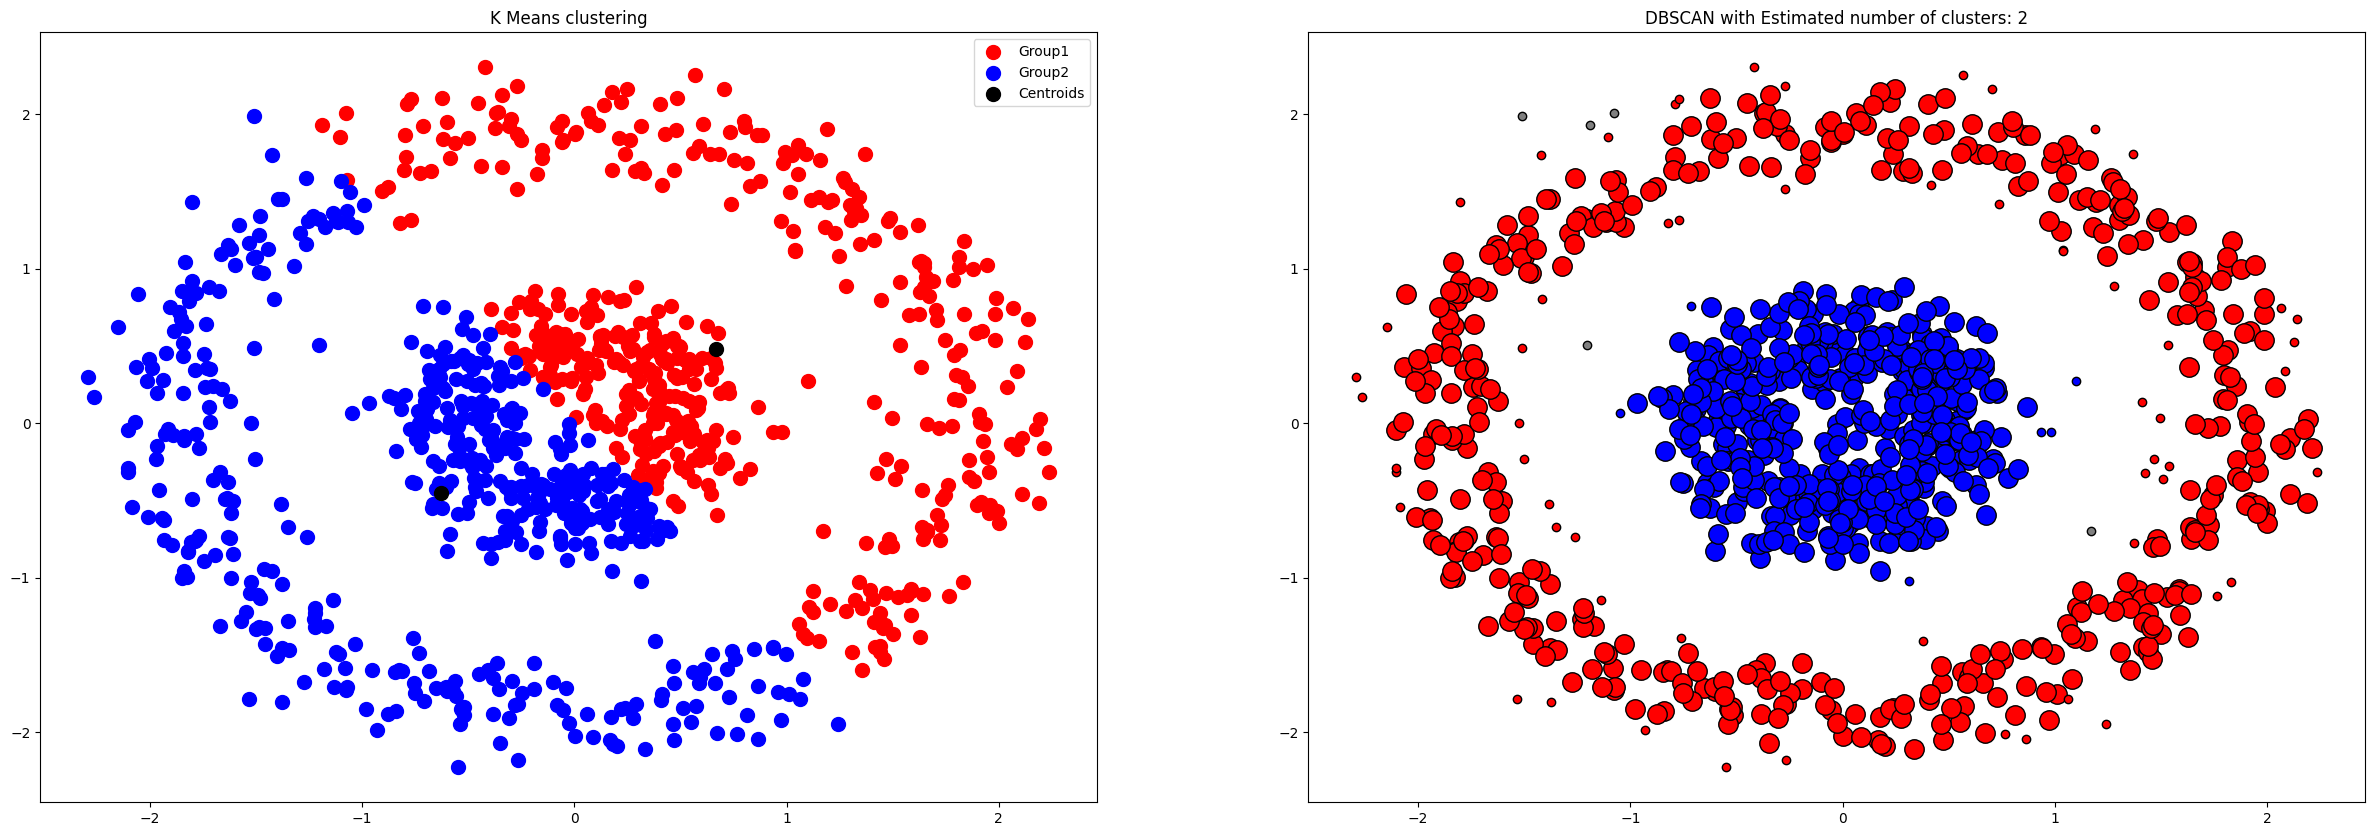

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols =2)
fig.set_figheight(10)
fig.set_figwidth(30)

colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    ax1.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids')
ax1.set_title("K Means clustering")
ax1.legend()


# Gray removed and is used for noise instead.
unique_labels = set(labels)
for k, col in zip(unique_labels, colours):
    if k == -1:
        # Gray used for noise.
        col = 'gray'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=6)

ax2.set_title('DBSCAN with Estimated number of clusters: %d' % n_clusters_);